# 4.1 Deep Computer Vision

Module - Deep Vision

For book, references and training materials, please check this project website [http://activefitness.ai/ai-in-sports-with-python](http://activefitness.ai/ai-in-sports-with-python).

Reference: Chapter 6, [Applied Machine Learning for Health and Fitness](https://www.apress.com/us/book/9781484257715)

## Detecting facial features

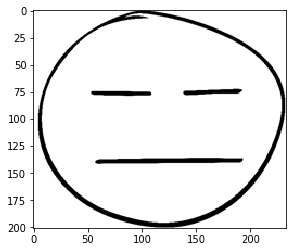

[[ 49 106 143  71]]


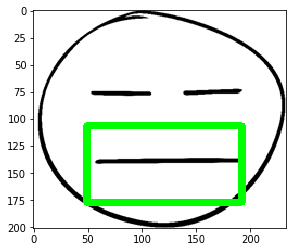

In [23]:
import cv2
import matplotlib.pyplot as plt
import wget

image = cv2.imread('media/face.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
features = cascade.detectMultiScale(image)
print(features)
for (x, y, w, h) in features:
    img = image.copy()
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 6)
    plt.imshow(img)
    plt.show()


## Loading visual datasets


In [1]:
import torch
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.utils.data.sampler import SubsetRandomSampler

f = 'data/activities'

def load(f, size = .2):
    
    t = transforms.Compose([transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize(mean = [0.485, 0.456, 0.406], 
        std = [0.229, 0.224, 0.225])])
        
    train = datasets.ImageFolder(f, transform=t)
    test = datasets.ImageFolder(f, transform=t)
    n = len(train)
    indices = list(range(n))
    split = int(np.floor(size * n))
    np.random.shuffle(indices)
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train,sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test, sampler=test_sampler, batch_size=64)
    return trainloader, testloader

trainloader, testloader = load(f, .2)
print(trainloader.dataset.classes)
images, labels = next(iter(trainloader))
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.permute(1,2,0))

['surfing', 'tennis']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
